# Домашнє завдання

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
import random
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import wandb
from wandb.keras import WandbMetricsLogger

2023-08-28 20:54:23.101188: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
max_features = 20000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 256
epochs=50
validation_split=0.3

project_name = "Hw11_1"

In [3]:
wandb.init(project=project_name, config={"epochs": epochs, "batch_size": batch_size, "validation_split": validation_split})

wandb: Currently logged in as: vladyslav_tymoshchuk. Use `wandb login --relogin` to force relogin


In [4]:
(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words=max_features)

In [5]:
data_train = pad_sequences(train_data, maxlen=maxlen)
data_test = pad_sequences(test_data, maxlen=maxlen)

In [55]:
class Model:
    def __init__(self, input_train, y_train, var, epochs, batch_size, validation_split):
        self.var = var
        
        self.input_train = input_train
        self.y_train = y_train
        self.epochs = epochs
        self.batch_size = batch_size
        self.validation_split = validation_split

        self.callback_early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1, mode="max")
        self.callback_save = ModelCheckpoint("best_Hw11.hdf5", monitor="val_loss", save_best_only=True)

        self.model = Sequential()
        self.model.add(Embedding(max_features, 32))
        self.model.add(var)
        self.model.add(Dense(1, activation='sigmoid'))

    def compile(self):
        self.model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
        return self.model

    def summary(self):
        self.model.summary()
        return self.model

    def fit(self):
        fits = self.model.fit(self.input_train,
                              self.y_train,
                              epochs=self.epochs,
                              batch_size=self.batch_size,
                              validation_split=self.validation_split,
                              callbacks=[self.callback_early_stopping, WandbMetricsLogger(), self.callback_save])
        return fits

# SimpleRNN

In [7]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 var=SimpleRNN(32),
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)

2023-08-28 20:54:39.990762: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-28 20:54:40.039584: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-28 20:54:40.040014: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-28 20:54:40.044399: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-28 20:54:40.044812: I tensorflow/compile

In [8]:
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 642113 (2.45 MB)
Trainable params: 642113 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model.fit()

Epoch 1/10


2023-08-28 20:54:46.130863: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7678011ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-28 20:54:46.130980: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 3GB, Compute Capability 6.1
2023-08-28 20:54:46.144906: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-28 20:54:46.738360: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-28 20:54:46.893531: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


69/69 [==============================] - 102s 1s/step - loss: 0.6872 - acc: 0.5440 - val_loss: 0.6788 - val_acc: 0.5687
Epoch 2/10


/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 97s 1s/step - loss: 0.6136 - acc: 0.6873 - val_loss: 0.5546 - val_acc: 0.7516
Epoch 3/10
69/69 [==============================] - 94s 1s/step - loss: 0.4621 - acc: 0.8054 - val_loss: 0.4626 - val_acc: 0.8000
Epoch 4/10
69/69 [==============================] - 98s 1s/step - loss: 0.3919 - acc: 0.8284 - val_loss: 0.4206 - val_acc: 0.8223
Epoch 5/10
69/69 [==============================] - 96s 1s/step - loss: 0.2640 - acc: 0.8997 - val_loss: 0.4355 - val_acc: 0.8071
Epoch 6/10
69/69 [==============================] - 94s 1s/step - loss: 0.1911 - acc: 0.9353 - val_loss: 0.4654 - val_acc: 0.7976
Epoch 6: early stopping


In [10]:
wandb.finish()

epoch/acc,▁▄▆▆▇█
epoch/epoch,▁▂▄▅▇█
epoch/learning_rate,▁▁▁▁▁▁
epoch/loss,█▇▅▄▂▁
epoch/val_acc,▁▆▇██▇
epoch/val_loss,█▅▂▁▁▂
epoch/acc,0.93531
epoch/epoch,5
epoch/learning_rate,0.001
epoch/loss,0.19115
epoch/val_acc,0.7976


In [11]:
def line_plot(history=history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
    plt.title('Точність тренування і валідації')  # Заголовок графіку
    plt.legend()  # Показати легенду
    
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
    plt.title('Втрати тренування і валідації')  # Заголовок графіку
    plt.legend()  # Показати легенду
    
    plt.show()  # Відобразити графіки

In [12]:
def test_prediction(model=model):
    predictions = model.model.predict(data_test)
    
    # Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
    
    # Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")
    
    # Додатковий крок: Оцінка моделі
    # Це дасть загальну точність моделі на тестових даних
    test_loss, test_acc = model.model.evaluate(data_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))

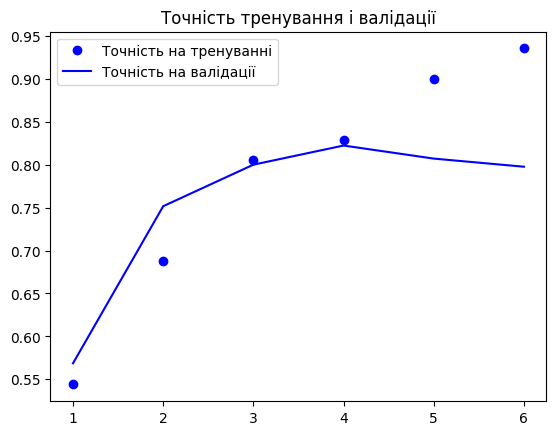

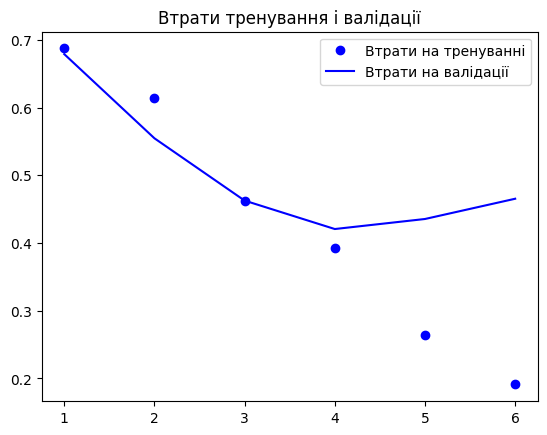

In [13]:
line_plot(history)

In [14]:
test_prediction(model)

782/782 [==============================] - 96s 122ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 98s 125ms/step - loss: 0.4599 - acc: 0.7990
Test Loss: 0.45987898111343384
Test Accuracy: 0.7990000247955322


# LSTM

In [15]:
wandb.init(project=project_name, config={"epochs": epochs, "batch_size": batch_size, "validation_split": validation_split})

In [16]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 var=LSTM(32),
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)

In [17]:
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          640000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 648353 (2.47 MB)
Trainable params: 648353 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history = model.fit()

Epoch 1/10
69/69 [==============================] - 25s 306ms/step - loss: 0.6700 - acc: 0.5945 - val_loss: 0.5487 - val_acc: 0.7332
Epoch 2/10


/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 19s 273ms/step - loss: 0.4854 - acc: 0.7879 - val_loss: 0.4682 - val_acc: 0.7824
Epoch 3/10
69/69 [==============================] - 19s 272ms/step - loss: 0.3576 - acc: 0.8514 - val_loss: 0.3420 - val_acc: 0.8552
Epoch 4/10
69/69 [==============================] - 17s 246ms/step - loss: 0.3002 - acc: 0.8829 - val_loss: 0.3424 - val_acc: 0.8519
Epoch 5/10
69/69 [==============================] - 18s 256ms/step - loss: 0.2441 - acc: 0.9095 - val_loss: 0.2958 - val_acc: 0.8835
Epoch 6/10
69/69 [==============================] - 16s 230ms/step - loss: 0.2224 - acc: 0.9171 - val_loss: 0.3962 - val_acc: 0.8495
Epoch 7/10
69/69 [==============================] - 14s 212ms/step - loss: 0.1866 - acc: 0.9341 - val_loss: 0.2961 - val_acc: 0.8824
Epoch 7: early stopping


In [19]:
wandb.finish()

epoch/acc,▁▅▆▇▇██
epoch/epoch,▁▂▃▅▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁
epoch/loss,█▅▃▃▂▂▁
epoch/val_acc,▁▃▇▇█▆█
epoch/val_loss,█▆▂▂▁▄▁
epoch/acc,0.93411
epoch/epoch,6
epoch/learning_rate,0.001
epoch/loss,0.18662
epoch/val_acc,0.8824


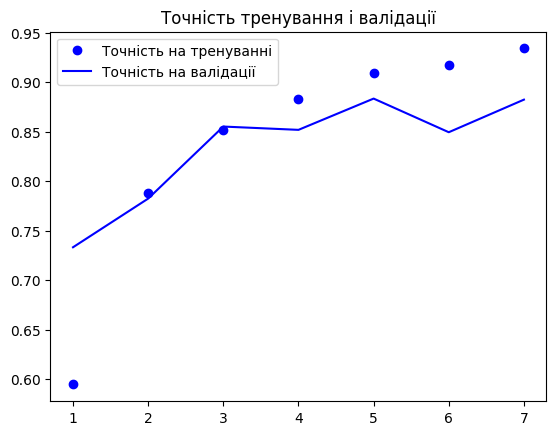

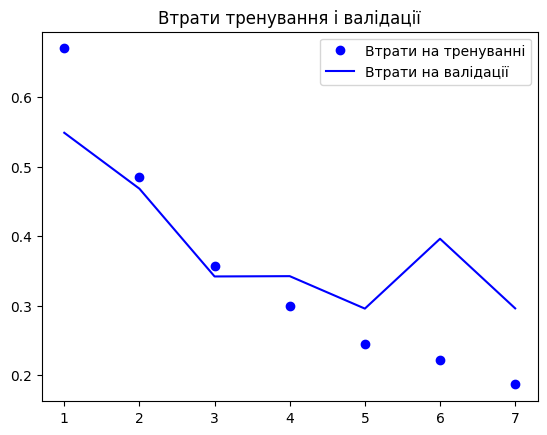

In [20]:
line_plot(history)

In [21]:
test_prediction(model)

782/782 [==============================] - 24s 30ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 28s 36ms/step - loss: 0.3155 - acc: 0.8765
Test Loss: 0.31548985838890076
Test Accuracy: 0.8765199780464172


# Bidirectional(LSTM(32))

In [53]:
wandb.init(project=project_name, config={"epochs": epochs, "batch_size": batch_size, "validation_split": validation_split})

In [56]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 var=Bidirectional(LSTM(32)),
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)

In [57]:
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          640000    
                                                                 
 bidirectional_8 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 656705 (2.51 MB)
Trainable params: 656705 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
history = model.fit()

Epoch 1/50
69/69 [==============================] - 28s 342ms/step - loss: 0.6890 - acc: 0.5508 - val_loss: 0.6489 - val_acc: 0.7029
Epoch 2/50


/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 22s 316ms/step - loss: 0.5611 - acc: 0.7413 - val_loss: 0.4759 - val_acc: 0.7752
Epoch 3/50
69/69 [==============================] - 21s 308ms/step - loss: 0.4103 - acc: 0.8317 - val_loss: 0.4021 - val_acc: 0.8325
Epoch 4/50
69/69 [==============================] - 20s 290ms/step - loss: 0.3273 - acc: 0.8717 - val_loss: 0.4309 - val_acc: 0.8221
Epoch 5/50
69/69 [==============================] - 20s 288ms/step - loss: 0.2747 - acc: 0.8961 - val_loss: 0.3155 - val_acc: 0.8663
Epoch 6/50
69/69 [==============================] - 17s 252ms/step - loss: 0.2368 - acc: 0.9103 - val_loss: 0.2941 - val_acc: 0.8828
Epoch 7/50
69/69 [==============================] - 18s 261ms/step - loss: 0.2021 - acc: 0.9257 - val_loss: 0.2929 - val_acc: 0.8864
Epoch 8/50
69/69 [==============================] - 17s 240ms/step - loss: 0.1838 - acc: 0.9341 - val_loss: 0.3661 - val_acc: 0.8619
Epoch 9/50
69/69 [==============================] - 19s 270ms/step - loss: 0.154

In [59]:
wandb.finish()

epoch/acc,▁▄▆▇▇▇███
epoch/epoch,▁▂▃▄▅▅▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▄▃▃▂▂▁▁
epoch/val_acc,▁▄▆▆▇██▇█
epoch/val_loss,█▅▃▄▁▁▁▂▂
epoch/acc,0.94577
epoch/epoch,8
epoch/learning_rate,0.001
epoch/loss,0.15434
epoch/val_acc,0.8792


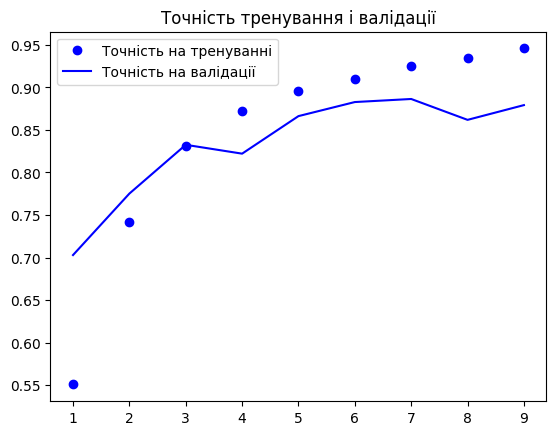

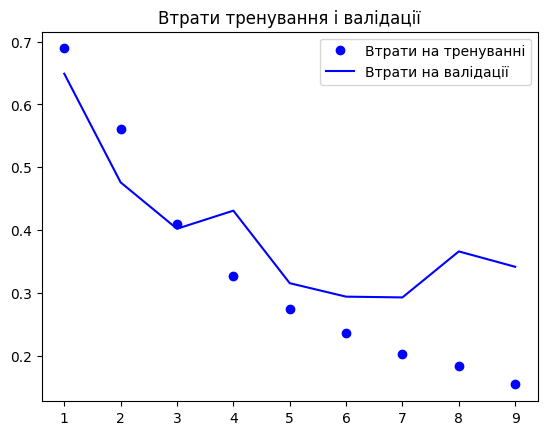

In [60]:
line_plot(history)

In [61]:
test_prediction(model)

782/782 [==============================] - 51s 64ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 47s 60ms/step - loss: 0.3652 - acc: 0.8671
Test Loss: 0.36519908905029297
Test Accuracy: 0.8671200275421143


# Bidirectional(GRU(32))

In [29]:
wandb.init(project=project_name, config={"epochs": epochs, "batch_size": batch_size, "validation_split": validation_split})

In [30]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 var=Bidirectional(GRU(32)),
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)

In [31]:
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          640000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                12672     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 652737 (2.49 MB)
Trainable params: 652737 (2.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
history = model.fit()

Epoch 1/10
69/69 [==============================] - 28s 343ms/step - loss: 0.6900 - acc: 0.5403 - val_loss: 0.6839 - val_acc: 0.5809
Epoch 2/10


/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 20s 290ms/step - loss: 0.6251 - acc: 0.6651 - val_loss: 0.4789 - val_acc: 0.7735
Epoch 3/10
69/69 [==============================] - 20s 297ms/step - loss: 0.4189 - acc: 0.8128 - val_loss: 0.3793 - val_acc: 0.8312
Epoch 4/10
69/69 [==============================] - 19s 276ms/step - loss: 0.3224 - acc: 0.8650 - val_loss: 0.3747 - val_acc: 0.8353
Epoch 5/10
69/69 [==============================] - 19s 280ms/step - loss: 0.2679 - acc: 0.8927 - val_loss: 0.3696 - val_acc: 0.8485
Epoch 6/10
69/69 [==============================] - 18s 258ms/step - loss: 0.2176 - acc: 0.9166 - val_loss: 0.3200 - val_acc: 0.8677
Epoch 7/10
69/69 [==============================] - 18s 262ms/step - loss: 0.2025 - acc: 0.9265 - val_loss: 0.3280 - val_acc: 0.8737
Epoch 8/10
69/69 [==============================] - 18s 256ms/step - loss: 0.1740 - acc: 0.9375 - val_loss: 0.3444 - val_acc: 0.8621
Epoch 9/10
69/69 [==============================] - 17s 248ms/step - loss: 0.156

In [33]:
wandb.finish()

epoch/acc,▁▃▆▇▇████
epoch/epoch,▁▂▃▄▅▅▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▄▃▂▂▂▁▁
epoch/val_acc,▁▆▇▇▇████
epoch/val_loss,█▄▂▂▂▁▁▁▂
epoch/acc,0.94286
epoch/epoch,8
epoch/learning_rate,0.001
epoch/loss,0.15602
epoch/val_acc,0.85507


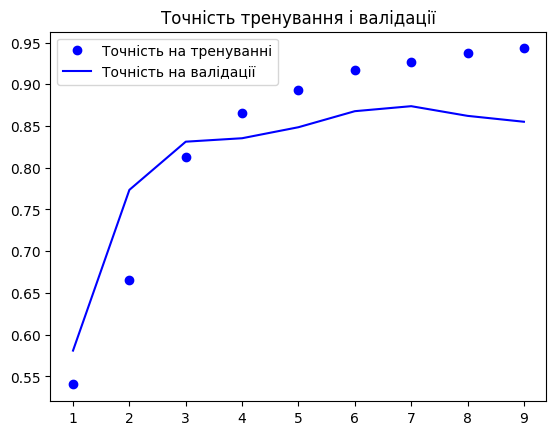

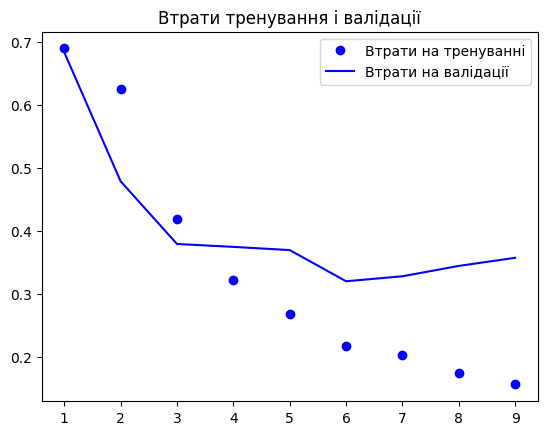

In [34]:
line_plot(history)

In [35]:
test_prediction(model)

782/782 [==============================] - 44s 55ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 50s 64ms/step - loss: 0.3652 - acc: 0.8496
Test Loss: 0.36517518758773804
Test Accuracy: 0.8496400117874146


# Глибока

In [44]:
class Model:
    def __init__(self, input_train, y_train, epochs, batch_size, validation_split):
        
        self.input_train = input_train
        self.y_train = y_train
        self.epochs = epochs
        self.batch_size = batch_size
        self.validation_split = validation_split

        self.callback_early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1, mode="max")
        self.callback_save = ModelCheckpoint("best_Hw11.hdf5", monitor="val_loss", save_best_only=True)

        self.model = Sequential()
        self.model.add(Embedding(max_features, 32))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32)))
        self.model.add(Dense(1, activation='sigmoid'))

    Bidirectional(LSTM(32))

    def compile(self):
        self.model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
        return self.model

    def summary(self):
        self.model.summary()
        return self.model

    def fit(self):
        fits = self.model.fit(self.input_train,
                              self.y_train,
                              epochs=self.epochs,
                              batch_size=self.batch_size,
                              validation_split=self.validation_split,
                              callbacks=[self.callback_early_stopping, WandbMetricsLogger(), self.callback_save])
        return fits

    def predict(self):
        return model.predict(data_test)

In [45]:
wandb.init(project=project_name, config={"epochs": epochs, "batch_size": batch_size, "validation_split": validation_split})

In [46]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)

In [47]:
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          640000    
                                                                 
 bidirectional_3 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, None, 64)          0         
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 64)          24832     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, None, 64)          0         
                                                                 
 bidirectional_5 (Bidirecti  (None, None, 64)         

In [48]:
history = model.fit()

Epoch 1/10
69/69 [==============================] - 72s 830ms/step - loss: 0.6931 - acc: 0.5010 - val_loss: 0.6941 - val_acc: 0.4960
Epoch 2/10


/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 50s 731ms/step - loss: 0.6932 - acc: 0.5001 - val_loss: 0.6933 - val_acc: 0.4885
Epoch 3/10
69/69 [==============================] - 51s 748ms/step - loss: 0.6759 - acc: 0.5662 - val_loss: 0.6154 - val_acc: 0.6856
Epoch 4/10
69/69 [==============================] - 51s 746ms/step - loss: 0.5917 - acc: 0.7113 - val_loss: 0.5976 - val_acc: 0.7213
Epoch 5/10
69/69 [==============================] - 50s 718ms/step - loss: 0.5489 - acc: 0.7526 - val_loss: 0.6486 - val_acc: 0.6613
Epoch 6/10
69/69 [==============================] - 50s 726ms/step - loss: 0.6101 - acc: 0.6585 - val_loss: 0.5954 - val_acc: 0.7179
Epoch 6: early stopping


In [49]:
wandb.finish()

epoch/acc,▁▁▃▇█▅
epoch/epoch,▁▂▄▅▇█
epoch/learning_rate,▁▁▁▁▁▁
epoch/loss,██▇▃▁▄
epoch/val_acc,▁▁▇█▆█
epoch/val_loss,██▂▁▅▁
epoch/acc,0.65851
epoch/epoch,5
epoch/learning_rate,0.001
epoch/loss,0.61011
epoch/val_acc,0.71787


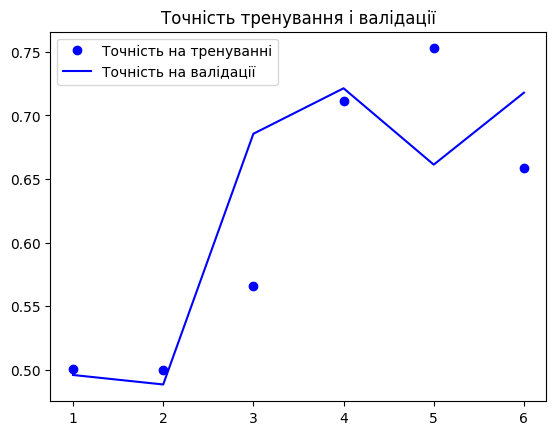

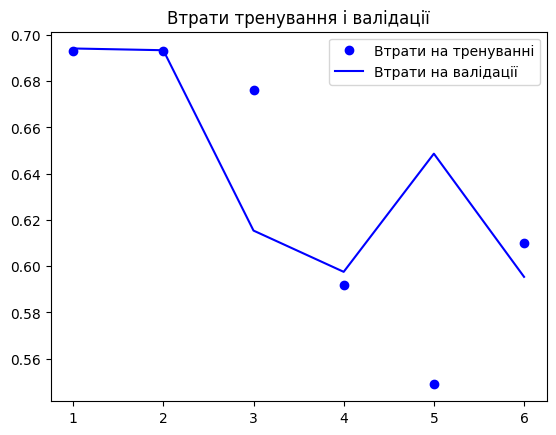

In [50]:
line_plot(history)

In [51]:
test_prediction(model)

782/782 [==============================] - 163s 203ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 169s 217ms/step - loss: 0.5982 - acc: 0.7154
Test Loss: 0.5982226133346558
Test Accuracy: 0.715399980545044


# Висновок

Найкраще себе показала модель LSTM(32) та Bidirectional(LSTM(32)). 

LSTM(32)
Test Loss: 0.31548985838890076
Test Accuracy: 0.876519978046417

Bidirectional(LSTM(32))
Test Loss: 0.36519908905029297
Test Accuracy: 0.8671200275421143
Провівши декілька тестів, в глибокій рекурентній нейроній мережі мені не вдалось досягти кращих показників
Test Loss: 0.5982226133346558
Test Accuracy: 0.715399980545044
2